(1) Cube Roots: Estimate $\sqrt[3]{25}$ as follows. Note that, for comparison, Julia can compute the cubic root with cbrt(25).

In [17]:
cbrt(25)

2.924017738212866

(a) For $f(x) = x^3 − 25$ and the initial interval $[2, 3]$, use the theoretical error bounds for the bisection method to predict how many iterations are necesary such taht the error is smaller than $\approx 10^{-8}$. Do NOT use generative AI to complete this part of the assignment.

In [18]:
f(x) = x^3 - 25;
abs_tol = 1e-8;
a = 2;
b = 3;
n_max = 100;

In [19]:
n_max = ceil(Int, log2((b-a)/abs_tol))
n_max

27

(b) After applying the bisection method, how many iterations were required to obtain an error smaller than $\approx 10^{-8}$? Have your code display the absolute error at each iteration. Do NOT use generative AI to complete this part of the assignment; you may use code from class.

In [20]:
function bisection(f, a, b, n_max, abs_tol; verbose = true)
    converged = false;
    p = 0;
    p_old = p;

    for i in 1:n_max
        p = 0.5*(a+b) # compute the midpoint

        # determine if the root is in the left or right interval
        if (f(a) * f(p) <= 0)
            b = p; # root is interval [a,p]
        else
            a = p; # root is interval [p,b]
        end

        # print current iterate information to screen 
        if verbose
            println("$i: a = $a, b = $b, p = $p, Absolute Error  = $(0.5*(b-a))")
        end
    
        if (f(p) == 0)
            converged = true;
            break
        end

        # test for convergence
        if 0.5*(b-a) < abs_tol
            converged = true;
            break
        end
        p_old = p;
    end

    if !converged
        println("Error: Did not converge after $n_max iterations")
    end

    return p; # return midpoint guess
    
end

bisec = bisection(f, a, b, n_max, abs_tol)
bisec

1: a = 2.5, b = 3, p = 2.5, Absolute Error  = 0.25
2: a = 2.75, b = 3, p = 2.75, Absolute Error  = 0.125
3: a = 2.875, b = 3, p = 2.875, Absolute Error  = 0.0625
4: a = 2.875, b = 2.9375, p = 2.9375, Absolute Error  = 0.03125
5: a = 2.90625, b = 2.9375, p = 2.90625, Absolute Error  = 0.015625
6: a = 2.921875, b = 2.9375, p = 2.921875, Absolute Error  = 0.0078125
7: a = 2.921875, b = 2.9296875, p = 2.9296875, Absolute Error  = 0.00390625
8: a = 2.921875, b = 2.92578125, p = 2.92578125, Absolute Error  = 0.001953125
9: a = 2.923828125, b = 2.92578125, p = 2.923828125, Absolute Error  = 0.0009765625
10: a = 2.923828125, b = 2.9248046875, p = 2.9248046875, Absolute Error  = 0.00048828125
11: a = 2.923828125, b = 2.92431640625, p = 2.92431640625, Absolute Error  = 0.000244140625
12: a = 2.923828125, b = 2.924072265625, p = 2.924072265625, Absolute Error  = 0.0001220703125
13: a = 2.9239501953125, b = 2.924072265625, p = 2.9239501953125, Absolute Error  = 6.103515625e-5
14: a = 2.92401123046

2.9240177422761917

Note that we had an answer with error $\approx 10^{-8}$ after 26 iterations, even though the theorem said we needed 27.

(c) Setting p0 = 3, apply Newton’s method to $f(x) = x^3 − 25$ to estimate $\sqrt[3]{25}$, such that the error is smaller than $\approx 10^{-8}$. How many iterations are required? Display the error during the iteration process. Do NOT use generative AI to complete this part of the assignment; you may use code from class.

In [21]:
f(x) = x^3 - 25;
df(x) = 3x^2;
abs_tol = 1e-8;
p0 = 3;
n_max = 100;

In [22]:
function newton(f, df, p0, n_max, abs_tol; verbose = true)
    converged = false;
    p = p0;
    p_old = p0;

    for i in 1:n_max
        p = p_old - f(p_old)/df(p_old);

        # print current iterate information to screen 
        if verbose
            println("$i: p = $p, Absolute Error = $(abs(p - p_old))");
        end

        # test for convergence
        if (i>1)
            if abs(p-p_old) < abs_tol
                converged = true;
                break
            end
        end
        p_old = p;
    end

    if !converged
        println("Error: Did not converge after $n_max iterations")
    end

    return p; # return midpoint guess
    
end

newt = newton(f, df, p0, n_max, abs_tol)
newt

1: p = 2.925925925925926, Absolute Error = 0.07407407407407396
2: p = 2.924018982396379, Absolute Error = 0.0019069435295469006
3: p = 2.9240177382133954, Absolute Error = 1.244182983750619e-6
4: p = 2.924017738212866, Absolute Error = 5.293543381412746e-13


2.924017738212866

(d) Use generative AI to solve this problem using the method of false position. You should prompt your AI to write an algorithm, taking in the logical arguments, displaying the error at each iteration, and returning the solution. Clearly state which AI you used, along with the prompt(s).

Prompt used: Write a Julia function false_position to estimate the root of $f(x) = x^3 − 25$ using the Method of False Position. The function should take five arguments: $f$ (the function), $a$ and $b$ (the endpoints of the interval), $n_max$ (max_iterations), and $abs_tol$ (absolute tolerance). The function must display the absolute error at each iteration and return the final approximation.

AI used: Gemini.

In [23]:
f(x) = x^3 - 25;
abs_tol = 1e-8;
a = 2.; # Use floating point numbers
b = 3.; # Use floating point numbers
n_max = 100;

In [24]:
function false_position(f, a, b, n_max, abs_tol; verbose = true)
    converged = false;
    
    # check if a root is bracketed
    if f(a) * f(b) >= 0
        error("The Method of False Position requires f(a) and f(b) to have opposite signs.")
    end

    # initialize p and p_old outside the loop to handle scope
    p = a;
    p_old = a;

    for i in 1:n_max
        # calculate p using the false position formula
        p = b - f(b) * (b - a) / (f(b) - f(a));

        # calculate the absolute error = |p - p_old|
        err = abs(p - p_old);

        # print current iterate information to screen 
        if verbose
            println("$i: $p, Absolute Error = $err")
        end

        # check for convergence
        if err < abs_tol
            converged = true;
            break
        end

        # update p_old = p for the next iteration's error calculation
        p_old = p;

        # update the interval [a, b]
        if f(p) * f(a) < 0
            # the root is in [a, p], so set b = p
            b = p;
        else
            # the root is in [p, b], so set a = p
            a = p;
        end
    end

    return p;
end

false_pos = false_position(f, a, b, n_max, abs_tol)
false_pos

1: 2.8947368421052633, Absolute Error = 0.8947368421052633
2: 2.92326495908173, Absolute Error = 0.028528116976466844
3: 2.923998508100832, Absolute Error = 0.0007335490191020533
4: 2.9240172470506254, Absolute Error = 1.8738949793206672e-5
5: 2.924017725667992, Absolute Error = 4.786173666282423e-7
6: 2.924017737892455, Absolute Error = 1.2224462775378697e-8
7: 2.9240177382046824, Absolute Error = 3.122275771261229e-10


2.9240177382046824

(e) Comment on how the number of significant digits changes between iterations for these methods.

The Bisection Method shows linear convergence, requiring 26 iterations so that the absolute error is smaller than $10^{-8}$. The Method of False Position also has a linear convergence rate (though often with a larger reduction factor than Bisection), demonstrating a speed improvement so that the absolute error is smaller than $10^{-8}$ in just 7 iterations. In stark contrast, Newton's Method displays quadratic convergence, which means the number of correct significant digits approximately doubles with each step, so that the absolute error is smaller than $10^{-8}$ in only 4 iterations when starting close to the root.

All in all, the convergence speed, measured by the inverse of the number of iterations required for the target accuracy, ranks as follows:
$$\text{Newton's Method} \gg \text{False Position} > \text{Bisection Method}$$
* Newton's Method: 4 iterations
* False Position: 7 iterations
* Bisection Method: 26 iterations

 (2) Zeros of Polynomials: The polynomial $f(x) = 230x^4 +18x^3 +9x^2 −221x−9$ has two real zeros, one in the interval $[−1,0]$ and one in the interval $[0, 1]$. The other two zeros are complex conjugate.

(a) Use generative AI to plot this function for $x ∈ [−1,1]$ such that both roots are visible. Clearly state which AI you used, along with the prompt(s).

Prompt used: Write Julia code to plot the function $f(x)=230x^{4}+18x^{3}+9x^{2}-221x-9$ over the interval $x ∈ [−1,1]$. Ensure both real roots are clearly visible. Use the Plots package.

AI used: Gemini.

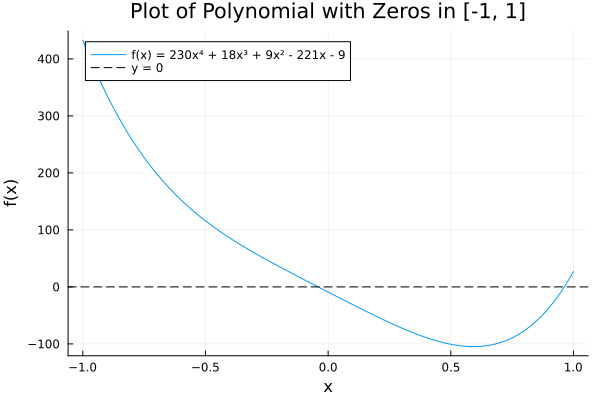

In [25]:
# install the Plots package
# use Pkg; Pkg.add("Plots")
using Plots

# define the polynomial function f(x)
f(x) = 230*x^4 + 18*x^3 + 9*x^2 - 221*x - 9

# define the interval for plotting
x_range = -1:0.01:1

# generate the plot
plot(x_range, 
     f, 
     label="f(x) = 230x⁴ + 18x³ + 9x² - 221x - 9",
     xlabel="x",
     ylabel="f(x)",
     title="Plot of Polynomial with Zeros in [-1, 1]",
     legend=:topleft)

# add a horizontal line at y=0 to clearly show the roots
hline!([0], 
       line=:dash, 
       color=:black, 
       label="y = 0")

# store the plot object
plot_2a = plot!()

# display the plot
display(plot_2a)

(b)  Try to obtain the two real roots, to an accuracy of $\approx 10^{-6}$, using Newton’s method. Pick reasonable, but well chosen, values for $p0$ in each case. Do NOT use generative AI to complete this part of the assignment; you may use code from class.

In [26]:
function newton(f, df, p0, n_max, abs_tol; verbose = true)
    converged = false;
    p = p0;
    p_old = p0;

    for i in 1:n_max
        p = p_old - f(p_old)/df(p_old);

        # print current iterate information to screen 
        if verbose
            println("$i: p = $(p), |f(p)| = $(abs(f(p)))");
        end

        # test for convergence
        if (i>1)
            if abs(p-p_old) < abs_tol
                converged = true;
                break
            end
        end
        p_old = p;
    end

    if !converged
        println("Error: Did not converge after $n_max iterations")
    end

    return p; # return midpoint guess
    
end

newton (generic function with 1 method)

By looking at the graph, the root is where the function crosses the x-axis $(y = 0)$. Therefore, a reasonable, well-chosen $p_0$ for Root 1: $p_0 = -0.1$ or and a reasonable, well-chosen $p_0$ for Root 2: $p_0 = 0.9$.

In [27]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9;
df(x) = 920x^3 + 54x^2 + 18x - 221;
abs_tol = 1e-6;
p0 = -0.1;
n_max = 100;

newt = newton(f, df, p0, n_max, abs_tol)
newt

1: p = -0.04087731875616095, |f(p)| = 0.0483387477738475
2: p = -0.040659290265695, |f(p)| = 4.323094913161185e-7
3: p = -0.04065928831575886, |f(p)| = 0.0


-0.04065928831575886

In [28]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9;
df(x) = 920x^3 + 54x^2 + 18x - 221;
abs_tol = 1e-6;
p0 = 0.9;
n_max = 100;

newt = newton(f, df, p0, n_max, abs_tol)
newt

1: p = 0.9717887837996939, |f(p)| = 6.376681848840207
2: p = 0.9625712797273669, |f(p)| = 0.11523657623507688
3: p = 0.96239847876793, |f(p)| = 3.9996287625854166e-5
4: p = 0.9623984187505487, |f(p)| = 4.774847184307873e-12


0.9623984187505487

(c) Repeat with the Secant Method. Do NOT use generative AI to complete this part of the assignment; you may use code from class.

In [29]:
function secant(f, p0, p1, n_max, abs_tol; verbose = true)
    
    converged = false;
    
    p = p0;
    for i in 1:n_max

        p = p1 - f(p1) * (p1-p0)/(f(p1)-f(p0));
        
        # print current iterate information to screen 
        if verbose
            println("$i: p = $(p), |f(p)| = $(abs(f(p)))")
        end
        
        # test for convergence
        if (i>1)
            if abs(p-p1) < abs_tol
                converged = true;
                break
            end
        end
        p0 = p1;
        p1 = p;

    end
    
    if !converged
        println("Error: Did not converge after $n_max iterations")
    end

    return p; # return midpoint guess
    
end



secant (generic function with 1 method)

Root 1: $p_0 = -0.1$

In [30]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9;
p0 = -0.1;
p1 = -0.05;
abs_tol = 1e-6;
n_max = 100;

seca = secant(f, p0, p1, n_max, abs_tol);
seca

1: p = -0.04068763239367769, |f(p)| = 0.006284015087796746
2: p = -0.0406592994025848, |f(p)| = 2.4579984856387682e-6
3: p = -0.04065928831577174, |f(p)| = 2.8546054409162025e-12


-0.04065928831577174

Root 2: $p_0 = 0.9$

In [31]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9;
p0 = 0.9;
p1 = 0.95;
abs_tol = 1e-6;
n_max = 100;

seca = secant(f, p0, p1, n_max, abs_tol);
seca

1: p = 0.9641241644337429, |f(p)| = 1.1540497792223334
2: p = 0.962354804051203, |f(p)| = 0.029062793439038614
3: p = 0.9623982678402838, |f(p)| = 0.00010056831285965018
4: p = 0.9623984187637684, |f(p)| = 8.814566854198347e-9


0.9623984187637684

(d) Use Muller’s method to obtain all four zeros. Do NOT use generative AI to complete this part of the assignment; you may use code from class.

In [32]:
function muller(f, p0, p1, p2, n_max, abs_tol; verbose = true)
    
    converged = false;
    p = p2;

    for i in 1:n_max

        # solve for the constants a, b, and c
        c = f(p2);
        A = [(p0-p2)^2 p0-p2; (p1-p2)^2 p1-p2 ]; # builds matrix
        x = A\[f(p0)-c; f(p1)-c]; # solves for a and b
        a = x[1];
        b = x[2];
        
        # take the root with larger denominator
        if abs(b + sqrt(b^2-4*a*c))> abs(b - sqrt(b^2-4*a*c))
            p = p2 - 2*c/(b + sqrt(b^2-4*a*c));
        else
            p = p2 - 2*c/(b - sqrt(b^2-4*a*c));            
        end
        
        if verbose
            println(" $i: p = $(p), |f(p)| = $(abs(f(p)))")
        end
        
        # test for convergence
        if (i>1)
            if abs(p-p2) < abs_tol
                converged = true;
                break
            end
        end

        # update entries
        p0 = p1;
        p1 = p2;
        p2 = p;

    end
    
    if !converged
        println("Error: Did not converge after $n_max iterations")
    end

    return p # return midpoint guess
    
end

muller (generic function with 1 method)

Root 1: $p_0 = -0.2$

In [ ]:
root1 = muller(f, -0.2, -0.1, 0.0, n_max, abs_tol)

 1: p = -0.04076399872369613, |f(p)| = 0.023214861498853878
 2: p = -0.04065931534696446, |f(p)| = 5.9929381777124036e-6
 3: p = -0.0406592883157641, |f(p)| = 1.1617373729677638e-12


-0.0406592883157641

Root 2: $p_0 = -0.1$

In [49]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9;
p0 = -0.1
p1 = -0.1 + 2*im
p2 = -0.1 + 4*im
abs_tol = 1e-6;
n_max = 100;

root2 = muller(f, p0, p1, p2, n_max, abs_tol);
root2

 1: p = -0.10814193560430664 + 1.7182972749667855im, |f(p)| = 1963.2834877510343
 2: p = -0.5148571327836766 + 1.5659494437485726im, |f(p)| = 1379.3468430767978
 3: p = -0.6327590834079846 + 1.3600476612550576im, |f(p)| = 815.8508769949002
 4: p = -0.661711594988931 + 1.0256181209474857im, |f(p)| = 228.4910873525568
 5: p = -0.6288562326442584 + 0.830634940453298im, |f(p)| = 95.54320959249384
 6: p = -0.4750303080640528 + 0.8843079309610519im, |f(p)| = 20.71757393522544
 7: p = -0.49905607834348475 + 0.8650107276667597im, |f(p)| = 0.9173160162863035
 8: p = -0.5000048690529904 + 0.8660317295247529im, |f(p)| = 0.005298428856947133
 9: p = -0.49999999975075593 + 0.8660254041832353im, |f(p)| = 3.121388247558018e-7
 10: p = -0.49999999999999994 + 0.8660254037844386im, |f(p)| = 7.105427357601002e-14


-0.49999999999999994 + 0.8660254037844386im

Root 3: $p_0 = 0.8$

In [50]:
root3 = muller(f, 0.8, 0.9, 1.0, n_max, abs_tol)

 1: p = 0.9619050624759947, |f(p)| = 0.32845249599347426
 2: p = 0.9623968645261591, |f(p)| = 0.0010357498927362485
 3: p = 0.9623984187110872, |f(p)| = 2.6292781285519595e-8
 4: p = 0.9623984187505414, |f(p)| = 0.0


0.9623984187505414

Root 4: $p_0 = 0.9$

In [51]:
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9;
p0 = 0.9;
p1 = 0.9 - 2*im;
p2 = 0.9 - 4*im;
abs_tol = 1e-6;
n_max = 100;

root4 = muller(f, p0, p1, p2, n_max, abs_tol);
root4

 1: p = 0.5670542307519877 - 1.7797796880161436im, |f(p)| = 3160.623633911536
 2: p = 0.06248377280094286 - 1.7772378131036932im, |f(p)| = 2360.4455199611366
 3: p = -0.20541619382935355 - 1.5992712253055468im, |f(p)| = 1436.6653179724958
 4: p = -0.4033559058524426 - 1.248659750555721im, |f(p)| = 462.3461350641815
 5: p = -0.5258712644754974 - 1.0551255527821395im, |f(p)| = 178.69630851771035
 6: p = -0.5499449853030746 - 0.9088530039729128im, |f(p)| = 49.390408510583896
 7: p = -0.5041183263612105 - 0.8585650594915691im, |f(p)| = 5.604299182168741
 8: p = -0.4999199090357 - 0.8661619651181902im, |f(p)| = 0.10509590317853439
 9: p = -0.4999998856742294 - 0.8660254505850937im, |f(p)| = 8.199363520871518e-5
 10: p = -0.5000000000000208 - 0.8660254037842111im, |f(p)| = 1.5167667576180027e-10


-0.5000000000000208 - 0.8660254037842111im

(3)  Fixed Points: Solve Problem 6 (10th Edition) from Section 2.2 of Burden & Faires. Do NOT use generative AI to complete this part of the assignment; you may use code from class.

In [35]:
7^(1/5)

1.4757731615945522

In [36]:
function fixed_point_iteration(g, p, n_max, abs_tol; verbose=true)
    p_old = p;
    
    for i in 1:n_max
        p = g(p);

        # print current iterate information to screen 
        if verbose
            println("$i: p = $p");
        end
        
        # test for convergence
        if(i>1)
            if abs(p_old-p) < abs_tol
                break;
            end
        end
        p_old = p;
    end

    return p; # return midpoint guess
    
end

fixed_point_iteration (generic function with 1 method)

In [37]:
# Method (a): p_n = p_{n-1} * (1 + (7 - p_{n-1}^5) / p_{n-1}^2)^3
g_a(p) = p * (1 + (7 - p^5) / (p^2))^3
p0 = 1;
abs_tol = 1e-6;
n_max = 100;

println("Method (a)")
p_a = fixed_point_iteration(g_a, p0, n_max, abs_tol)

Method (a)
1: p = 343.0
2: p = -2.253933861495501e25
3: p = -3.383854504272191e253
4: p = NaN
5: p = NaN
6: p = NaN
7: p = NaN
8: p = NaN
9: p = NaN
10: p = NaN
11: p = NaN
12: p = NaN
13: p = NaN
14: p = NaN
15: p = NaN
16: p = NaN
17: p = NaN
18: p = NaN
19: p = NaN
20: p = NaN
21: p = NaN
22: p = NaN
23: p = NaN
24: p = NaN
25: p = NaN
26: p = NaN
27: p = NaN
28: p = NaN
29: p = NaN
30: p = NaN
31: p = NaN
32: p = NaN
33: p = NaN
34: p = NaN
35: p = NaN
36: p = NaN
37: p = NaN
38: p = NaN
39: p = NaN
40: p = NaN
41: p = NaN
42: p = NaN
43: p = NaN
44: p = NaN
45: p = NaN
46: p = NaN
47: p = NaN
48: p = NaN
49: p = NaN
50: p = NaN
51: p = NaN
52: p = NaN
53: p = NaN
54: p = NaN
55: p = NaN
56: p = NaN
57: p = NaN
58: p = NaN
59: p = NaN
60: p = NaN
61: p = NaN
62: p = NaN
63: p = NaN
64: p = NaN
65: p = NaN
66: p = NaN
67: p = NaN
68: p = NaN
69: p = NaN
70: p = NaN
71: p = NaN
72: p = NaN
73: p = NaN
74: p = NaN
75: p = NaN
76: p = NaN
77: p = NaN
78: p = NaN
79: p = NaN
80: p = NaN

NaN

In [38]:
# Method (b): p_n = p_{n-1} - (p_{n-1}^5 - 7) / p_{n-1}^2
g_b(p) = p - (p^5 - 7) / (p^2)
p0 = 1;
abs_tol = 1e-6;
n_max = 100;

println("Method (b)")
p_b = fixed_point_iteration(g_b, p0, n_max, abs_tol)

Method (b)
1: p = 7.0
2: p = -335.85714285714283
3: p = 3.788435671143231e7
4: p = -5.437255629158596e22
5: p = 1.6074565945577786e68
6: p = -Inf
7: p = NaN
8: p = NaN
9: p = NaN
10: p = NaN
11: p = NaN
12: p = NaN
13: p = NaN
14: p = NaN
15: p = NaN
16: p = NaN
17: p = NaN
18: p = NaN
19: p = NaN
20: p = NaN
21: p = NaN
22: p = NaN
23: p = NaN
24: p = NaN
25: p = NaN
26: p = NaN
27: p = NaN
28: p = NaN
29: p = NaN
30: p = NaN
31: p = NaN
32: p = NaN
33: p = NaN
34: p = NaN
35: p = NaN
36: p = NaN
37: p = NaN
38: p = NaN
39: p = NaN
40: p = NaN
41: p = NaN
42: p = NaN
43: p = NaN
44: p = NaN
45: p = NaN
46: p = NaN
47: p = NaN
48: p = NaN
49: p = NaN
50: p = NaN
51: p = NaN
52: p = NaN
53: p = NaN
54: p = NaN
55: p = NaN
56: p = NaN
57: p = NaN
58: p = NaN
59: p = NaN
60: p = NaN
61: p = NaN
62: p = NaN
63: p = NaN
64: p = NaN
65: p = NaN
66: p = NaN
67: p = NaN
68: p = NaN
69: p = NaN
70: p = NaN
71: p = NaN
72: p = NaN
73: p = NaN
74: p = NaN
75: p = NaN
76: p = NaN
77: p = NaN
78: p

NaN

In [39]:
# Method (c): p_n = p_{n-1} - (p_{n-1}^5 - 7) / (5 * p_{n-1}^4) 
# (This is Newton's Method for f(p) = p^5 - 7)
g_c(p) = p - (p^5 - 7) / (5 * p^4)
p0 = 1;
abs_tol = 1e-6;
n_max = 100;

println("Method (c) (Newton's)")
p_c = fixed_point_iteration(g_c, p0, n_max, abs_tol)

Method (c) (Newton's)
1: p = 2.2
2: p = 1.8197636773444439
3: p = 1.5834748298961614
4: p = 1.4894609741454279
5: p = 1.476022436131861
6: p = 1.4757732457766084
7: p = 1.4757731615945617


1.4757731615945617

In [40]:
# Method (d): p_n = p_{n-1} - (p_{n-1}^5 - 7) / 12
g_d(p) = p - (p^5 - 7) / 12
p0 = 1;
abs_tol = 1e-6;
n_max = 100;
println("Method (d)")
p_d = fixed_point_iteration(g_d, p0, n_max, abs_tol)

Method (d)
1: p = 1.5
2: p = 1.4505208333333333
3: p = 1.4987496607981932
4: p = 1.4519035351323157
5: p = 1.4975770669956294
6: p = 1.4531922902089593
7: p = 1.4964753637027304
8: p = 1.45439611887026
9: p = 1.4954385872694187
10: p = 1.4555228100193351
11: p = 1.4944615128307357
12: p = 1.4565791375091208
13: p = 1.4935395329408152
14: p = 1.4575710313755594
15: p = 1.4926685600559113
16: p = 1.4585037146814728
17: p = 1.4918449475118374
18: p = 1.4593818138557741
19: p = 1.4910654249861364
20: p = 1.4602094483945303
21: p = 1.49032704540826
22: p = 1.4609903043396433
23: p = 1.4896271409937483
24: p = 1.461727694894639
25: p = 1.4889632866065716
26: p = 1.4624246107588466
27: p = 1.4883332690494504
28: p = 1.4630837621815913
29: p = 1.4877350611813327
30: p = 1.4637076143018464
31: p = 1.4871667999898501
32: p = 1.4642984170074183
33: p = 1.486626767922733
34: p = 1.4648582302937692
35: p = 1.486113376919007
36: p = 1.4653889459062845
37: p = 1.4856251546879062
38: p = 1.46589230589

1.473578045466708

All in all, the convergence speed, measured by the inverse of the number of iterations required for the target accuracy, ranks as follows:
* Method (c) (Newton's): Converges fast after 4 iterations
* Method (d): Seemingly converges but slowly after 100+ iterations
* Cannot rank Method (a): Diverges after 3 iterations and Method (b): Diverges after 6 iterations